In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns #!pip install seaborn
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Create a reference to the CSV and import it into a Pandas DataFrame
nyc_airbnb_data = "my_data.csv"
nyc_airbnb_df = pd.read_csv(nyc_airbnb_data)
nyc_airbnb_df.head().style

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.6475,-73.9724,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.7536,-73.9838,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.9419,Private room,150,3,0,nan,nan,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.6851,-73.9598,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.7985,-73.944,Entire home/apt,80,10,9,2018-11-19,0.1,1,0


In [3]:
# Create DataFrama
nyc_airbnb = nyc_airbnb_df[["name", "neighbourhood_group", "neighbourhood", "room_type", "price", 
                            "minimum_nights", "availability_365", "id"]]
nyc_airbnb.head()

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365,id
0,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,365,2539
1,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,355,2595
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,365,3647
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,194,3831
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,0,5022


In [4]:
# Rename columns
nyc_airbnb = nyc_airbnb.rename(columns={"name": "Name",
                                        "neighbourhood_group": "Cities",
                                        "neighbourhood": "Neighbourhood",
                                        "room_type": "Room Type",
                                        "price": "Price",
                                        "minimum_nights": "Minimum Nights",
                                        "availability_365": "Yearly Availability",
                                        "id": "ID"})

nyc_airbnb.head().style

,Name,Cities,Neighbourhood,Room Type,Price,Minimum Nights,Yearly Availability,ID
0,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,365,2539
1,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,355,2595
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,365,3647
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,194,3831
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,0,5022


In [5]:
# Groupby room type by Price average
mean_price_of_rooms = nyc_airbnb.groupby(["Room Type"],as_index=False)

# Create DataFrame
avrg_price = pd.DataFrame(mean_price_of_rooms["Price"].mean())

# Formating currency
avrg_price["Price"] = avrg_price["Price"].astype(float).map("${:,.2f}".format)
#pivot = avrg_price.pivot()

avrg_price.style

,Room Type,Price
0,Entire home/apt,$211.79
1,Private room,$89.78
2,Shared room,$70.13


In [6]:
# Create Data Frame: Total Rooms and Percentage showing which rooms we have more
room_categ = pd.DataFrame({"Total Rooms" : nyc_airbnb["Room Type"].value_counts(),
                           "Per of Room Type" : nyc_airbnb["Room Type"].value_counts()/nyc_airbnb["Room Type"].count()/1})


# Set Index and Index name
index = ["Entire home/apt", "Private room", "Shared room"]
room_categ.index.name = "Room Type"

# Format with percentage and currency style
room_categ["Per of Room Type"] = room_categ["Per of Room Type"].astype(float).map("{:.2%}".format)
room_categ.style

,Total Rooms,Per of Room Type
Room Type,,
Entire home/apt,25409,51.97%
Private room,22326,45.66%
Shared room,1160,2.37%


In [7]:
# Group by Cities
group_city = nyc_airbnb.groupby(["Cities"],as_index=False)

# Create Data Frame by Price
city_avrg_prices = pd.DataFrame(group_city["Price"].mean())

# Create formating currency for Price column
city_avrg_prices["Price"] = city_avrg_prices["Price"].astype(float).map("${:,.2f}".format)

# Show Data Frame by style (bold index)
city_avrg_prices.style

,Cities,Price
0,Bronx,$87.50
1,Brooklyn,$124.38
2,Manhattan,$196.88
3,Queens,$99.52
4,Staten Island,$114.81


In [8]:
# Print both datas inside the window for preview
pd.set_option("display.max_rows", None)
print ("Room Category:")
print ("-----------------")
display(room_categ)
print ("Avarage Price:")
print ("-----------------")
display(avrg_price)
print ("Cities:")
print ("-----------------")
display(city_avrg_prices)

Room Category:
-----------------


,Total Rooms,Per of Room Type
Room Type,,
Entire home/apt,25409,51.97%
Private room,22326,45.66%
Shared room,1160,2.37%


Avarage Price:
-----------------


,Room Type,Price
0,Entire home/apt,$211.79
1,Private room,$89.78
2,Shared room,$70.13


Cities:
-----------------


,Cities,Price
0,Bronx,$87.50
1,Brooklyn,$124.38
2,Manhattan,$196.88
3,Queens,$99.52
4,Staten Island,$114.81


In [9]:
# Merge both DataFrames
merge_room_type = pd.merge(avrg_price, room_categ, on="Room Type")
pd.DataFrame(merge_room_type)
merge_room_type.style

,Room Type,Price,Total Rooms,Per of Room Type
0,Entire home/apt,$211.79,25409,51.97%
1,Private room,$89.78,22326,45.66%
2,Shared room,$70.13,1160,2.37%


In [10]:
# Adding Cities column to Data Frame
city_list = nyc_airbnb["Cities"]
merge_room_type["Cities"] = city_list
  
# Lock table
locked_table = merge_room_type.loc[:, ["Room Type", "Price", "Total Rooms", "Per of Room Type", "Cities"]]
locked_table

,Room Type,Price,Total Rooms,Per of Room Type,Cities
0,Entire home/apt,$211.79,25409,51.97%,Brooklyn
1,Private room,$89.78,22326,45.66%,Manhattan
2,Shared room,$70.13,1160,2.37%,Manhattan


In [11]:
# Remove $ from Price column - for be able to create the error bar
locked_table['Price']=locked_table['Price'].apply(lambda x:float(x.strip('$')))

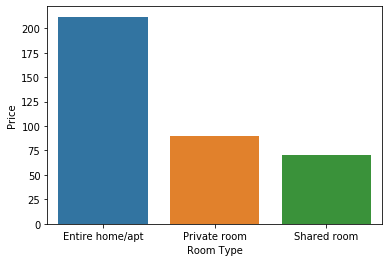

In [12]:
# Grouping by Cities and Room Type
# Setting index by false to see nice Data Frame
airbnb_new = locked_table.groupby(["Cities", "Room Type"],as_index=False)["Price"].mean()

# Show Data Frame by index style
airbnb_new.style

# Show Bar by seaborn (it's will shows you matplotlib errors bar by different color)
sns.barplot(airbnb_new["Room Type"], airbnb_new["Price"])

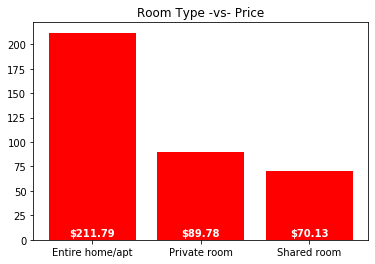

In [13]:
# Defind y values by price
y = airbnb_new["Price"].values

# Create plt bar
airbnb_bar = plt.bar(airbnb_new["Room Type"],airbnb_new["Price"], color = "r")

#Creating title 
plt.title("Room Type -vs- Price")

# Set up price by Roofor each bar
def autolabel(rects):
    for i,rect in enumerate(rects):
        plt.text(rect.get_x() + rect.get_width()/2., 2, '$%s'% (y[i]), ha="center", va="bottom", 
                 color="white", weight="bold")
                  

autolabel(airbnb_bar)

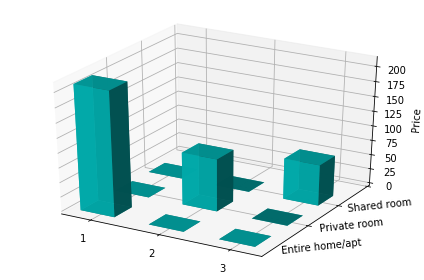

In [87]:
# Set price and room type for new DataFrame
prices = airbnb_new["Price"].values
type_of_r = airbnb_new["Room Type"]

# Create new Data Frame
data = pd.DataFrame({"in": [1,2,3], "r": type_of_r, "p": prices})

# Set 3D projection 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Show projection
ax

# Create pivot table
piv_tbl = pd.pivot_table(data, values="p", index="in", columns="r")

# Set all x, y  for 3D graph
xpos = np.arange(piv_tbl.shape[0])
ypos = np.arange(piv_tbl.shape[1])
xpos, ypos = np.meshgrid(xpos+0.25, ypos+0.25)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(piv_tbl.shape).flatten()

# Set delta x, y, z
dx = 0.5 * np.ones_like(zpos)
dy = 0.5 * np.ones_like(zpos)
dz = piv_tbl.values.ravel()
# Setting 
dz[np.isnan(dz)] = 0.

# Set 3D graph - adding color and shape 
    # with alpha showing dept(thickness)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color="c", alpha=0.9)


ax.set_xticks([.5, 1.5, 2.5])
ax.set_yticks([1.5, 2.5, 3.5])

# Set index and columns of graph
ax.w_xaxis.set_ticklabels(piv_tbl.index)
ax.w_yaxis.set_ticklabels(piv_tbl.columns, rotation=6)

# Set grid colors and linestyle
    #ax.zaxis._axinfo["grid"]['color'] = "c"
    #ax.zaxis._axinfo["grid"]['linestyle'] = "-"

# Formating for label and tight
fig.tight_layout()
ax.set_zlabel("Price")

# Show 3D histogram
plt.show()